# CSC 386 FINAL PROJECT PRESENTATION

# Importing all the required libraries

In [44]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import spacy
stop_words = set(stopwords.words('english'))
import re
import gensim
from gensim.models import Phrases
from gensim.corpora import Dictionary
import pandas as pd
import os
from pprint import pprint
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import pickle
pyLDAvis.enable_notebook()

# Part I: PREPROCESSING THE DATA

In [45]:
nlp = spacy.load('en_core_web_lg', disable=['tagger', 'parser', 'ner'])

In [46]:
nlp.max_length = 20000000

In [47]:
def readfiles(path):
    data = pd.read_csv(path)
    data.dropna(how='any', inplace=True)
    return data

# FOR CNBC ARTICLES

In [48]:
df = readfiles('cnbc_article.csv')
df

,article
0,"On the "","" this week, , , that “we are out of ..."
1,"Since the Covid-19 pandemic began, the vast ma..."
2,"When Rachel Bouman, a Chicago-based C-suite co..."
3,"Since the Covid-19 pandemic began, the vast ma..."
5,"The , is back after a two-year hiatus. , headl..."
...,...
354,", continuing a decades-old tradition , when he..."
355,The White House Correspondents' Dinner has ret...
356,"The , — beloved by some, loathed by others — i..."
357,"When Rachel Bouman, a Chicago-based C-suite co..."


In [49]:
df.article[0]

'On the "," this week, , , that “we are out of the pandemic phase” with Covid (he later ,, saying that decelerating numbers indicate we are not in a “full-blown explosive” phase of the pandemic). But Fauci also ,, an indoor event this Saturday that expects 2,000 attendees, because of the risks of contracting the virus. “I\'m 81 years old, and if I get infected, I have a much higher risk," he ,. President Joe Biden is 79. Both men fall in an age category at higher risk for developing severe illness if infected with Covid.,The risk for exposure to the virus at the event is not negligible. Physician and researcher Jeremy Faust estimated in a report for , that taking in the context — including the current case rate in Washington and negative testing the day of the event — the chance that at some point during the evening someone would be infectious is 50 percent. There is an ongoing pandemic, and the president has a decent chance of being in the room with the causative virus.,There is an on

In [50]:
def separate_punc(doc_text):
    return [WordNetLemmatizer().lemmatize(token.text.lower()) for token in nlp(doc_text) if WordNetLemmatizer().lemmatize(token.text.lower()) not in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\d+' and token.text not in stop_words]

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\TSIMAL~1\AppData\Local\Temp/ipykernel_24476/2444478441.py:2: DeprecationWarning: invalid escape sequence \d
  return [WordNetLemmatizer().lemmatize(token.text.lower()) for token in nlp(doc_text) if WordNetLemmatizer().lemmatize(token.text.lower()) not in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\d+' and token.text not in stop_words]


In [51]:
cnbc_tokens = [separate_punc(i) for i in df.article]
cnbc_tokens

c:\users\tsimalayh\appdata\local\programs\python\python39\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


[['on',
  'week',
  '“',
  'pandemic',
  'phase',
  '”',
  'covid',
  'later',
  'saying',
  'decelerating',
  'number',
  'indicate',
  '“',
  'full',
  'blown',
  'explosive',
  '”',
  'phase',
  'pandemic',
  'but',
  'fauci',
  'also',
  'indoor',
  'event',
  'saturday',
  'expects',
  '2,000',
  'attendee',
  'risk',
  'contracting',
  'virus',
  '“',
  'i',
  "'m",
  '81',
  'year',
  'old',
  'i',
  'get',
  'infected',
  'i',
  'much',
  'higher',
  'risk',
  'president',
  'joe',
  'biden',
  '79',
  'both',
  'men',
  'fall',
  'age',
  'category',
  'higher',
  'risk',
  'developing',
  'severe',
  'illness',
  'infected',
  'covid',
  ',the',
  'risk',
  'exposure',
  'virus',
  'event',
  'negligible',
  'physician',
  'researcher',
  'jeremy',
  'faust',
  'estimated',
  'report',
  'taking',
  'context',
  '—',
  'including',
  'current',
  'case',
  'rate',
  'washington',
  'negative',
  'testing',
  'day',
  'event',
  '—',
  'chance',
  'point',
  'evening',
  'some

In [52]:
total = 0
for i in cnbc_tokens:
    total += len(i)
total

74170

# FOR NBC ARTICLES

In [53]:
nbc_df = readfiles('nbc_article.csv')

In [54]:
nbc_tokens = [separate_punc(i) for i in nbc_df.article]

In [55]:
total = 0
for i in nbc_tokens:
    total += len(i)
total

44790

# FOR FOX NEWS ARTICLES

In [56]:
fox_df = readfiles('fox_articles.csv')

In [57]:
fox_df.article.astype(str)

0     Fox News Flash top headlines are here. Check o...
1     Fox News Flash top headlines are here. Check o...
2     'Special Report' host blasts Transportation Se...
3     J.C. Sampedro has an emotional reunion with fr...
4     Dr. Harvey Risch and Dr. Stephen Smith react t...
                            ...                        
93    What happens to those who refuse vaccination? ...
94    Fox News Flash top headlines are here. Check o...
95     press secretary Jen Psaki refused to discuss ...
96    Fox News Flash top headlines are here. Check o...
97    The latest efforts to prevent COVID outbreaks ...
Name: article, Length: 98, dtype: object

In [58]:
fox_df.article[1]

'Fox News Flash top headlines are here. Check out what\'s clicking on Foxnews.com., communications director Kate Bedingfield has tested positive for ,.\xa0,In a series of tweets, Bedingfield said she discovered her positive results on Friday morning.\xa0,"This morning, I tested positive for COVID-19. I last saw the president Wednesday in a socially-distanced meeting while wearing an N-95 mask, and he is not considered a close contact as defined by the CDC," she ,.\xa0,Bedingfield said that "thanks to being fully , and boosted" she is only experiencing mild symptoms.\xa0,"In alignment with White House COVID-19 protocols, I will work from home and plan to return to work in person at the conclusion of a five-day isolation period and a negative test," she said.\xa0,\n      White House Director of Communications Kate Bedingfield takes a question during a press briefing at the White House in Washington, U.S., March 29, 2022.\xa0\n      ,Bedingfield\'s announcement comes after , , for the vir

In [59]:
fox_tokens = [separate_punc(str(i)) for i in fox_df.article]

# Part II: CREATING LDA MODEL WITH GENSIM

In [67]:
def get_topics(data, model_name, corpus_name, dictionary_name):
    docs = data
    bigram = Phrases(docs, min_count=20)
    for ids in range(len(docs)):
        for token in bigram[docs[ids]]:
            if '_' in token:
                docs[ids].append(token)
                
    dictionary = Dictionary(docs)
    dictionary.filter_extremes(no_below=20, no_above=0.5)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    cloud = ' '.join([str(dictionary[i])for i in range(len(dictionary))])
    
    num_topics = 10
    chunksize = 64
    passes = 200
    iterations = 400
    eval_every = None

    temp = dictionary[0]
    id2word = dictionary.id2token

    model = LdaModel(corpus = corpus,
                    num_topics = num_topics,
                    chunksize = chunksize,
                    passes = passes,
                    eval_every = eval_every,
                    id2word = id2word,
                    iterations = iterations,
                    update_every = 1,
                    alpha = 'auto',
                    eta = 'auto')
    top_topics = model.top_topics(corpus) #, num_words=20)
    model.save(model_name)
    pickle.dump(corpus, open(corpus_name, 'wb'))
    dictionary.save(dictionary_name)
    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print('Average topic coherence: %.4f.' % avg_topic_coherence)
    wordcloud = WordCloud(background_color="white", width=6000, height=4000, max_words=500).generate(cloud)
    plt.imshow(wordcloud, interpolation="bilinear" )
    plt.axis("off")
    plt.show()

# Part III: VISUALIZING THE RESULT

Average topic coherence: -1.0281.


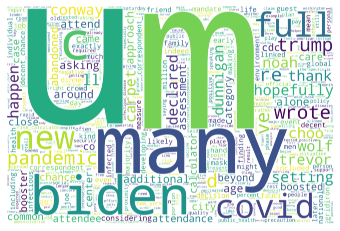

In [68]:
get_topics(cnbc_tokens, 'cnbc_model.gensim', 'cnbc_corpus.pkl', 'cnbc_dict.gensim')

Average topic coherence: -1.8866.


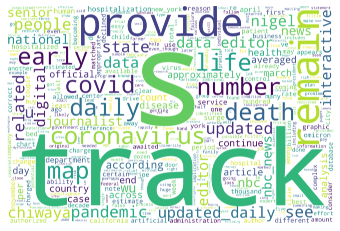

In [69]:
get_topics(nbc_tokens, 'nbc_model.gensim', 'nbc_corpus.pkl', 'nbc_dict.gensim')

Average topic coherence: -0.9529.


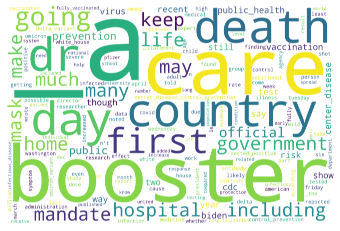

In [70]:
get_topics(fox_tokens, 'fox_model.gensim', 'fox_corpus.pkl', 'fox_dict.gensim')

In [71]:
cnbc_dictionary = gensim.corpora.Dictionary.load('cnbc_dict.gensim')
cnbc_corpus = pickle.load(open('cnbc_corpus.pkl', 'rb'))
cnbc_lda = gensim.models.ldamodel.LdaModel.load('cnbc_model.gensim')
cnbc_lda_display = pyLDAvis.gensim.prepare(cnbc_lda, cnbc_corpus, cnbc_dictionary)
pyLDAvis.display(cnbc_lda_display)

c:\users\tsimalayh\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [72]:
nbc_dictionary = gensim.corpora.Dictionary.load('nbc_dict.gensim')
nbc_corpus = pickle.load(open('nbc_corpus.pkl', 'rb'))
nbc_lda = gensim.models.ldamodel.LdaModel.load('nbc_model.gensim')
nbc_lda_display = pyLDAvis.gensim.prepare(nbc_lda, nbc_corpus, nbc_dictionary)
pyLDAvis.display(nbc_lda_display)

c:\users\tsimalayh\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [73]:
fox_dictionary = gensim.corpora.Dictionary.load('fox_dict.gensim')
fox_corpus = pickle.load(open('fox_corpus.pkl', 'rb'))
fox_lda = gensim.models.ldamodel.LdaModel.load('fox_model.gensim')
fox_lda_display = pyLDAvis.gensim.prepare(fox_lda, fox_corpus, fox_dictionary)
pyLDAvis.display(fox_lda_display)

c:\users\tsimalayh\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
